## Spam classification using Naive Bayes in ML

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer      # BOW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import joblib
print('All necessary library are imported !')

# SOME NLP NECESSARY LIBRARY
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer     # STEMMING

All necessary library are imported !


In [2]:
x , y = [],[]
with open('Data/SMSSpamCollection.txt','r') as file:
    data = file.read()
    for data_item in data.split('\n') :
        if len(data_item.split('\t')) == 2:
            y.append(data_item.split('\t')[0])
            x.append(data_item.split('\t')[1])
print('Successfully read the data from text file and splitted into X and Y')

# Initialization:

# x = []: An empty list to store the messages.
# y = []: An empty list to store the labels (spam or ham).
# Reading the File:

# with open('Data/SMSSpamCollection.txt', 'r') as file: Opens the file in read mode.
# data = file.read(): Reads the entire file content into the data variable.
# Splitting Data into Lines:

# for data_item in data.split('\n'): Iterates through each line in the file.
# Processing Each Line:

# if len(data_item.split('\t')) == 2: Checks if the line contains exactly two
#  elements when split by a tab character. This ensures that
#  the line is correctly formatted.
# y.append(data_item.split('\t')[0]): Adds the first element (label) to the y list.
# x.append(data_item.split('\t')[1]): Adds the second element (message) to the x list.
# Confirmation Message:

# print('Successfully read the data from text file and splitted into X and Y'): Prints a success message.


Successfully read the data from text file and splitted into X and Y


In [3]:
len(x),len(y)


(5574, 5574)

In [4]:
# preparing a dataframe from our read data.

data_dict = {'mail_message':x,'label':y}
df = pd.DataFrame(data_dict)
df.head()

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
for i in range(0,len(df)):
    mesage = re.sub('[^a-zA-Z]',' ',df['mail_message'][i])
    # This line uses a regular expression to replace any character
    #  that is not a letter (a-z or A-Z) with a space.
    mesage = mesage.lower()
    df['mail_message'][i] = mesage
    # his line updates the mail_message column with the cleaned message.
df.head(10)
#Text cleaning processing and lowerizing the text.

C:\Users\Jai\AppData\Local\Temp\ipykernel_24180\1693184124.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mail_message'][i] = mesage


,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


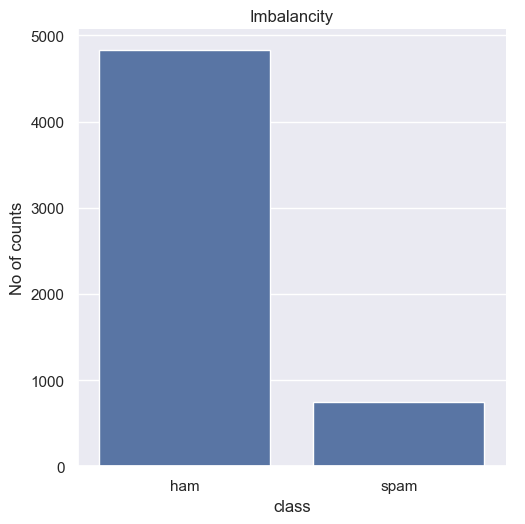

In [7]:
classs = list(df['label'].value_counts().index)
valu = list(df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Imbalancity')
plt.xlabel('class')
plt.ylabel('No of counts')
plt.show()

In [8]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [9]:
df.sample(2000)

,mail_message,label
4289,hey mr whats the name of that bill brison book...,ham
72,hi babe im at home now wanna do something xx,ham
4580,no plans yet what are you doing,ham
1451,msg me when rajini comes,ham
2034,im gonna miss u so much,ham
...,...,...
2978,ok omw now you at castor,ham
3131,ok but i finish at,ham
1592,that s my honeymoon outfit,ham
5333,x course it yrs just so her messages on mess...,ham


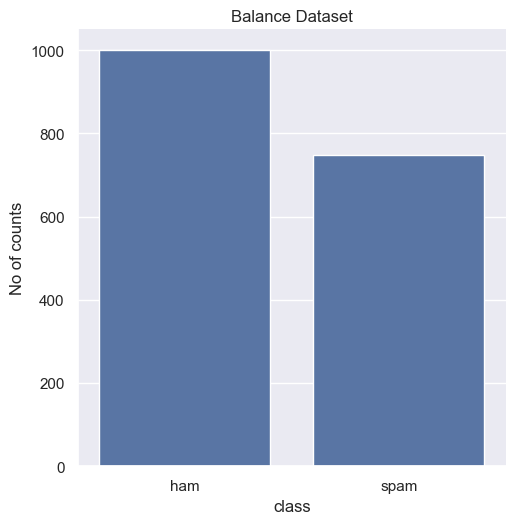

In [10]:
#filtering the dataset
ham = df[df['label']=='ham'].sample(1000)
spam = df[df['label']=='spam']

#concating the dataset
balance_df = pd.concat([ham,spam])

#visualaizing the datset
classs = list(balance_df['label'].value_counts().index)
valu = list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Balance Dataset')
plt.xlabel('class')
plt.ylabel('No of counts')
plt.show()


In [11]:
#label encoding of our Dependent variable
balance_df['label'] = balance_df['label'].map({'ham':0,'spam':1})

In [12]:
#checking the missing value
balance_df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [13]:
print(f"Duplicates in our dataset are :- {balance_df.duplicated().sum()}")
print(f"Shape of our Dataset before remove Duplicates :- {balance_df.shape}")


Duplicates in our dataset are :- 129
Shape of our Dataset before remove Duplicates :- (1747, 2)


In [14]:
balance_df.drop_duplicates(inplace=True)
# Duplicates are removed

In [15]:
print(f"Duplicates in our dataset are :- {balance_df.duplicated().sum()}")
print(f"Shape of our Dataset after remove Duplicates :- {balance_df.shape}")

Duplicates in our dataset are :- 0
Shape of our Dataset after remove Duplicates :- (1618, 2)


In [16]:
# Splitted The Data into X and Y
x = balance_df['mail_message']
y = balance_df['label']

In [17]:
x.head()

3312    hi darlin how was work did u get into trouble ...
4292                            call me when u re done   
4605                  thanx   puttin da fone down on me  
2985    he said that he had a right giggle when he saw...
4960    what i mean was i left too early to check  cos...
Name: mail_message, dtype: object

In [18]:
y.head()

3312    0
4292    0
4605    0
2985    0
4960    0
Name: label, dtype: int64

In [19]:
# prepares single list a of mails
x = x.values
x[0:5]


array(['hi darlin how was work did u get into trouble  ijust talked to your mum all morning  i had a really good time last night im goin out soon but call me if u can',
       'call me when u re done   ', 'thanx   puttin da fone down on me  ',
       'he said that he had a right giggle when he saw u again  you would possibly be the first person die from nvq  but think how much you could for  ',
       'what i mean was i left too early to check  cos i m working a     '],
      dtype=object)

In [20]:
x.shape

(1618,)

In [21]:
# intialaizing the bag of word class class
BOW_obj = CountVectorizer(max_features=2000,stop_words='english')


In [22]:
x.shape,type(x)

((1618,), numpy.ndarray)

In [23]:
x_transformed = BOW_obj.fit_transform(x)

In [24]:
x_transformed

<1618x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 12545 stored elements in Compressed Sparse Row format>

In [25]:
#sparse metrix to dense metrix conversion.
dense_matrix = x_transformed.toarray()
dense_matrix.shape


(1618, 2000)

In [26]:
# joblib.Dump(BOW_obj,'vectorizer.lb')

In [27]:
# checking the shape of the data before splitting into training and testing
x = dense_matrix
x.shape,     y.shape

((1618, 2000), (1618,))

In [28]:
#train test split the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# MultinomialNB

In [29]:
MNB  = MultinomialNB()

In [30]:
MNB.fit(x_train,y_train)

MultinomialNB()

## accuracy

In [31]:
MNB.score(x_train,y_train) #.round(2)*100     # on training data

0.9799072642967542

In [34]:
MNB.score(x_test,y_test)       # on testing data

0.9506172839506173

## Prediction

In [35]:
pred = MNB.predict(x_test)

In [36]:
confusion_matrix(y_test,pred)

array([[183,   6],
       [ 10, 125]], dtype=int64)

<Axes: >

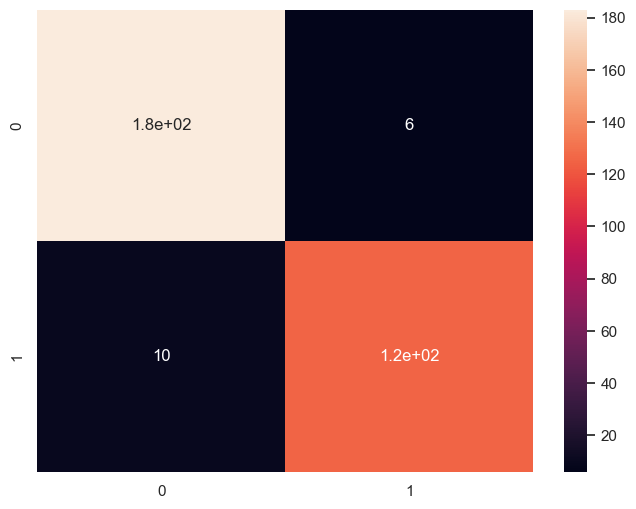

In [37]:
# sns.set(rc = {'figure.fisize',(8,8)})
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [38]:
print(classification_report(y_test,pred))
# classification report for model evaluation

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       189
           1       0.95      0.93      0.94       135

    accuracy                           0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.95      0.95      0.95       324



In [39]:
pickle.dump(BOW_obj,open('vectorizer.pkl','wb'))

In [40]:
pickle.dump(MNB,open('spamclassifier_MnB.pkl','wb'))
# to save the model

In [41]:
model=pickle.load(open('spamclassifier_MnB.pkl','rb'))
# to load the model

In [42]:
compare_dict = {'actual':y_test,'pred':pred}
comparison_df = pd.DataFrame(compare_dict)
comparison_df.head(30)

,actual,pred
3146,0,0
454,0,0
2663,1,0
3092,1,1
5554,0,0
3059,1,1
5484,1,1
4506,1,1
4376,1,1
1786,0,0


## Thankyou  ❤❤